<a href="https://colab.research.google.com/github/21b6008/21b6008_21b6023/blob/master/Assignment_2_Build_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Abdul Haziq Iman Bin Hj A. Mirasin - 21B6023
2. Nur Wajihah Nadhirah Binti Alidon - 21B6008
3. Full Name - Student ID

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

In [4]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [6]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCH = 15

In [7]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [8]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:01<00:00, 106604016.13it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [10]:
# Function to display a batch of images
def show_images(images):
    # Convert the tensor to NumPy array and adjust the range from [0, 1] to [0, 255]
    images = (images * 255).astype('uint8')

    # Create a grid of images (assuming images is a tensor with shape [batch_size, channels, height, width])
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2)

    # Plot the grid
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0))  # Permute the dimensions to [height, width, channels]
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [11]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [13]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/15, Loss: 2.1318, Accuracy: 23.888
Epoch 2/15, Loss: 1.7599, Accuracy: 37.384
Epoch 3/15, Loss: 1.5673, Accuracy: 44.112
Epoch 4/15, Loss: 1.4289, Accuracy: 48.734
Epoch 5/15, Loss: 1.3445, Accuracy: 51.998
Epoch 6/15, Loss: 1.2771, Accuracy: 54.484
Epoch 7/15, Loss: 1.2202, Accuracy: 56.75
Epoch 8/15, Loss: 1.1719, Accuracy: 58.494
Epoch 9/15, Loss: 1.1278, Accuracy: 60.34
Epoch 10/15, Loss: 1.0796, Accuracy: 61.874
Epoch 11/15, Loss: 1.0401, Accuracy: 63.516
Epoch 12/15, Loss: 0.9971, Accuracy: 64.972
Epoch 13/15, Loss: 0.9607, Accuracy: 66.416
Epoch 14/15, Loss: 0.9258, Accuracy: 67.78
Epoch 15/15, Loss: 0.8898, Accuracy: 69.204
Training complete!


# Training with GPU (Time: 3m 32s)
Epoch 1/15, Loss: 2.0829, Accuracy: 26.19

Epoch 2/15, Loss: 1.7308, Accuracy: 38.454

Epoch 3/15, Loss: 1.5539, Accuracy: 44.488

Epoch 4/15, Loss: 1.4193, Accuracy: 49.23

Epoch 5/15, Loss: 1.3290, Accuracy: 52.854

Epoch 6/15, Loss: 1.2622, Accuracy: 55.426

Epoch 7/15, Loss: 1.2088, Accuracy: 57.25

Epoch 8/15, Loss: 1.1579, Accuracy: 59.202

Epoch 9/15, Loss: 1.1137, Accuracy: 60.776

Epoch 10/15, Loss: 1.0676, Accuracy: 62.62

Epoch 11/15, Loss: 1.0258, Accuracy: 64.166

Epoch 12/15, Loss: 0.9860, Accuracy: 65.462

Epoch 13/15, Loss: 0.9480, Accuracy: 66.926

Epoch 14/15, Loss: 0.9143, Accuracy: 68.07

Epoch 15/15, Loss: 0.8823, Accuracy: 69.538


# Training with CPU (Time: 8m 43s)
Epoch 1/15, Loss: 2.1554, Accuracy: 22.388

Epoch 2/15, Loss: 1.7865, Accuracy: 36.606

Epoch 3/15, Loss: 1.5762, Accuracy: 44.072

Epoch 4/15, Loss: 1.4314, Accuracy: 48.784

Epoch 5/15, Loss: 1.3442, Accuracy: 51.914

Epoch 6/15, Loss: 1.2740, Accuracy: 54.538

Epoch 7/15, Loss: 1.2151, Accuracy: 56.91

Epoch 8/15, Loss: 1.1654, Accuracy: 58.854

Epoch 9/15, Loss: 1.1161, Accuracy: 60.7

Epoch 10/15, Loss: 1.0745, Accuracy: 62.224

Epoch 11/15, Loss: 1.0328, Accuracy: 63.436

Epoch 12/15, Loss: 0.9999, Accuracy: 64.84

Epoch 13/15, Loss: 0.9636, Accuracy: 66.056

Epoch 14/15, Loss: 0.9257, Accuracy: 67.47

Epoch 15/15, Loss: 0.8970, Accuracy: 68.468

Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?


1.   The GPU runtime completed the training in 3 minutes and 32 seconds,
while the CPU runtime took 8 minutes and 43 seconds. This indicates that using a GPU significantly accelerates the training process compared to using a CPU.

2.   The CPU loss is more higher than GPU (albeit miniscule difference)
3.   The CPU accuracy is lower than that of the GPU throughout the training


*   Were there any challenges or limitations you encountered while using the GPU for training?


1.   Older laptops(older gpus) might not be compatible with the machine learning framework and libraries.
2.   GPU tends to overheat and to prevent this we must use a effective cooling solutions.
3.   Some laptops dont have GPUs to train the machine.


*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?


1.   Both rapidly increases on accuracy
2.   Both CPU and GPU has a decrease in loss



Task 3: Visualize Loss and Accuracy


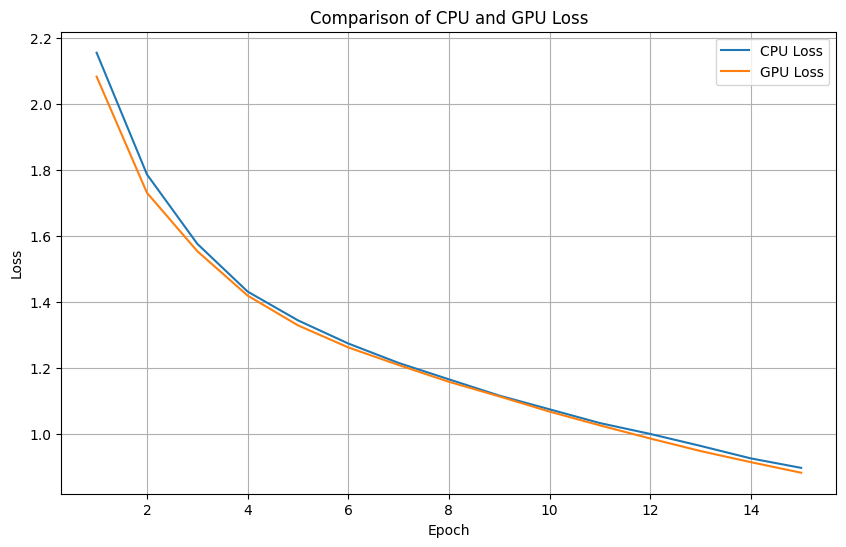

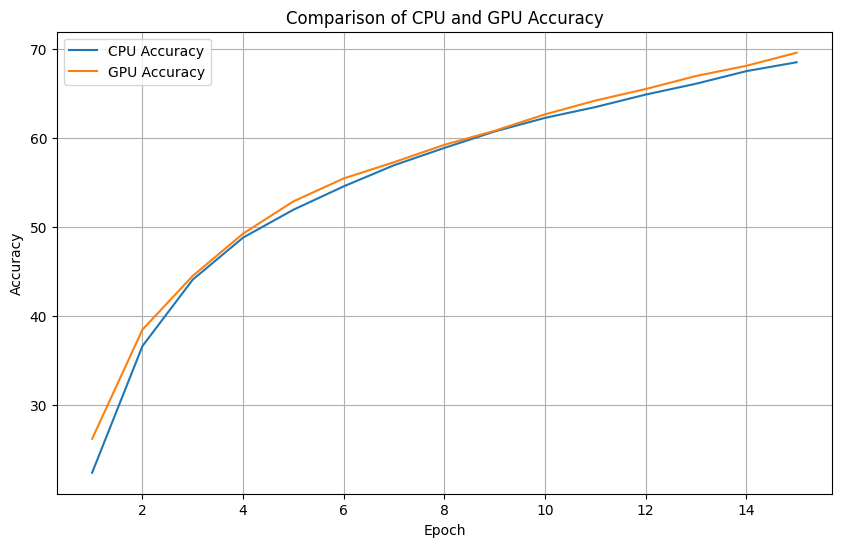

In [17]:
#TODO
import matplotlib.pyplot as plt

# Assuming you have already calculated and stored CPU and GPU loss and accuracy lists
cpu_losses = [2.1554, 1.7865, 1.5762, 1.4314, 1.3442, 1.2740, 1.2151, 1.1654, 1.1161, 1.0745, 1.0328, 0.9999, 0.9636, 0.9257, 0.8970]
gpu_losses = [2.0829, 1.7308, 1.5539, 1.4193, 1.3290, 1.2622, 1.2088, 1.1579, 1.1137, 1.0676, 1.0258, 0.9860, 0.9480, 0.9143, 0.8823]

cpu_accuracies = [22.388, 36.606, 44.072, 48.784, 51.914, 54.538, 56.91, 58.854, 60.7, 62.224, 63.436, 64.84, 66.056, 67.47, 68.468]
gpu_accuracies = [26.19, 38.454, 44.488, 49.23, 52.854, 55.426, 57.25, 59.202, 60.776, 62.62, 64.166, 65.462, 66.926, 68.07, 69.538]

epochs = list(range(1, 16))  # Create a list from 1 to 15 for x-axis (epochs)

# Plotting loss
plt.figure(figsize=(10, 6))

plt.plot(epochs, cpu_losses, label='CPU Loss')
plt.plot(epochs, gpu_losses, label='GPU Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison of CPU and GPU Loss')
plt.grid()

plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 6))

plt.plot(epochs, cpu_accuracies, label='CPU Accuracy')
plt.plot(epochs, gpu_accuracies, label='GPU Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of CPU and GPU Accuracy')
plt.grid()

plt.show()


Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



### **Testing Image**

In [20]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload)
    model.to('cpu')  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    predicted_label = train_set.classes[predicted_idx]
    print(f"Predicted label: {predicted_label}")  # Convert to string for printing



In [21]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")

Saving plane-data-BUSYROUTES1217-f4f84b08d47f4951b11c148cee2c3dea.jpg to plane-data-BUSYROUTES1217-f4f84b08d47f4951b11c148cee2c3dea (1).jpg
Predicted label: airplane
